In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from scipy.stats import ttest_ind

In [4]:
# Load the dataset
df = pd.read_csv("/content/ev_data.csv")

# Initial checks
print("Data shape:", df.shape)
print("\nMissing values per column:")
print(df.isnull().sum())

Data shape: (53, 25)

Missing values per column:
Car full name                             0
Make                                      0
Model                                     0
Minimal price (gross) [PLN]               0
Engine power [KM]                         0
Maximum torque [Nm]                       0
Type of brakes                            1
Drive type                                0
Battery capacity [kWh]                    0
Range (WLTP) [km]                         0
Wheelbase [cm]                            0
Length [cm]                               0
Width [cm]                                0
Height [cm]                               0
Minimal empty weight [kg]                 0
Permissable gross weight [kg]             8
Maximum load capacity [kg]                8
Number of seats                           0
Number of doors                           0
Tire size [in]                            0
Maximum speed [kph]                       0
Boot capacity (VDA) [l]    

In [31]:
# Task 1:
# a) Filter out EVs with a price of 350,000 PLN or less and a minimum WLTP range of 400 km.
filtered_ev = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]
# The above line creates a new DataFrame 'filtered_ev' containing only the EVs that meet the customer's criteria.

# b) Group the filtered EVs by the manufacturer (Make).
grouped_by_make = filtered_ev.groupby('Make')
# Here, the 'filtered_ev' DataFrame is grouped by the 'Make' column, creating groups for each manufacturer.

# c) Calculate the average battery capacity for each manufacturer.
average_battery_capacity = grouped_by_make['Battery capacity [kWh]'].mean().round(2).reset_index(name='Avg Battery Capacity [kWh]')
# This line computes the mean battery capacity for each group (manufacturer) and stores the result in 'average_battery_capacity'.

# Display the results
print(tabulate(average_battery_capacity, headers='keys', tablefmt='pretty', showindex=False))

+---------------+----------------------------+
|     Make      | Avg Battery Capacity [kWh] |
+---------------+----------------------------+
|     Audi      |            95.0            |
|      BMW      |            80.0            |
|    Hyundai    |            64.0            |
|      Kia      |            64.0            |
| Mercedes-Benz |            80.0            |
|     Tesla     |            68.0            |
|  Volkswagen   |           70.67            |
+---------------+----------------------------+



Lower bound for outliers: 3.7499999999999982
Upper bound for outliers: 35.35

Outlier Data Points:
Empty DataFrame
Columns: [Car full name, Make, Model, Minimal price (gross) [PLN], Engine power [KM], Maximum torque [Nm], Type of brakes, Drive type, Battery capacity [kWh], Range (WLTP) [km], Wheelbase [cm], Length [cm], Width [cm], Height [cm], Minimal empty weight [kg], Permissable gross weight [kg], Maximum load capacity [kg], Number of seats, Number of doors, Tire size [in], Maximum speed [kph], Boot capacity (VDA) [l], Acceleration 0-100 kph [s], Maximum DC charging power [kW], mean - Energy consumption [kWh/100 km]]
Index: []

[0 rows x 25 columns]


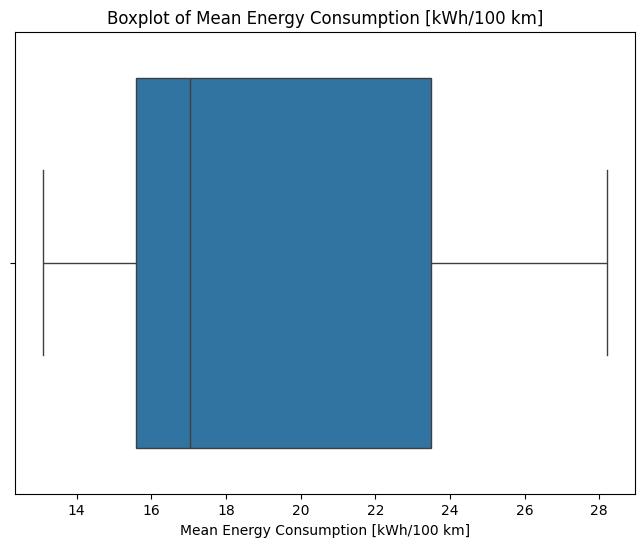

In [33]:
# Task 2:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
Q3 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['mean - Energy consumption [kWh/100 km]'] < lower_bound) |
              (df['mean - Energy consumption [kWh/100 km]'] > upper_bound)]

# Print lower and upper bounds
print("\nLower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)

# Display outlier rows
print("\nOutlier Data Points:")
print(outliers)

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['mean - Energy consumption [kWh/100 km]'], flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title("Boxplot of Mean Energy Consumption [kWh/100 km]")
plt.xlabel("Mean Energy Consumption [kWh/100 km]")
plt.show()


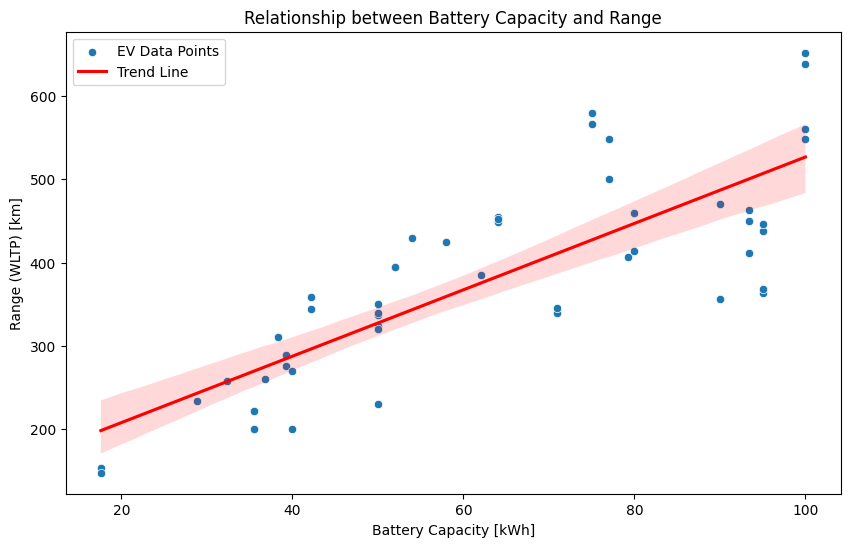

In [7]:
# Task 3:
# a) Create a scatter plot with a regression line to visualize the relationship
plt.figure(figsize=(10, 6))
# Scatter plot: each point represents an EV, plotting battery capacity (x-axis) vs. range (y-axis)
sns.scatterplot(data=df, x='Battery capacity [kWh]', y='Range (WLTP) [km]', label='EV Data Points')

# Regression line: helps visualize the trend or relationship between battery capacity and range
sns.regplot(data=df, x='Battery capacity [kWh]', y='Range (WLTP) [km]', scatter=False, color='red', label='Trend Line')

plt.title('Relationship between Battery Capacity and Range')
plt.xlabel('Battery Capacity [kWh]')
plt.ylabel('Range (WLTP) [km]')
plt.legend()
plt.show()

**Insights:**  
1. **Positive Relationship** – More battery capacity means a longer range.  
2. **Clear Trend** – The red line shows that as battery capacity increases, range also increases.  
3. **Some Variations** – Some EVs have better efficiency, giving them a longer range for the same battery size.  
4. **Key Takeaway** – Battery capacity is important, but efficiency also matters for range.

In [26]:
# Task 4:
import pandas as pd
from tabulate import tabulate

class EVRecommendation:
    def __init__(self, df):
        """Initialize the class with the EV dataset."""
        self.df = df

    def recommend(self, budget, min_range, min_battery):
        """
        Recommend the top 3 EVs based on user preferences.

        :param budget: Maximum budget in PLN
        :param min_range: Minimum desired range in km
        :param min_battery: Minimum battery capacity in kWh
        :return: DataFrame with the top 3 matching EVs
        """
        filtered_ev = self.df[
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= min_range) &
            (self.df['Battery capacity [kWh]'] >= min_battery)
        ]

        # Sort by highest range, then by battery capacity (descending order)
        top_ev = filtered_ev.sort_values(by=['Range (WLTP) [km]', 'Battery capacity [kWh]'], ascending=[False, False])

        # Return top 3 results
        return top_ev.head(3).reset_index(drop=True)

# Example usage with user input:
if __name__ == "__main__":
    # Load your dataset (Replace with your actual CSV file path)
    df = pd.read_csv("ev_data.csv")

    # Ask user for input
    budget = float(input("Enter your budget in PLN: "))
    min_range = float(input("Enter your minimum desired range in km: "))
    min_battery = float(input("Enter your minimum battery capacity in kWh: "))

    # Create EVRecommendation object
    ev_recommender = EVRecommendation(df)

    # Get top 3 recommended EVs
    top_ev = ev_recommender.recommend(budget, min_range, min_battery)

    print()
    # Check if any EVs matched the criteria
    if top_ev.empty:
        print("No EVs match your criteria.")
    else:
        # Specify the columns to display
        display_columns = [
            "Car full name",
            "Make",
            "Model",
        ]
        print("Top 3 Recommended EVs:")
        print(tabulate(top_ev[display_columns], headers='keys', tablefmt='pretty', showindex=False))

Enter your budget in PLN: 350000
Enter your minimum desired range in km: 400
Enter your minimum battery capacity in kWh: 50

Top 3 Recommended EVs:
+---------------------------+------------+---------------------+
|       Car full name       |    Make    |        Model        |
+---------------------------+------------+---------------------+
| Tesla Model 3 Long Range  |   Tesla    | Model 3 Long Range  |
| Tesla Model 3 Performance |   Tesla    | Model 3 Performance |
|   Volkswagen ID.3 Pro S   | Volkswagen |     ID.3 Pro S      |
+---------------------------+------------+---------------------+


In [12]:
# Task 5:
# Extract engine power values for Tesla vehicles and Audi vehicles
tesla_engine_power = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi_engine_power = df[df['Make'] == 'Audi']['Engine power [KM]']

# Perform a two-sample t-test
# equal_var=False is used to not assume equal population variances (Welch's t-test)
t_stat, p_value = ttest_ind(tesla_engine_power, audi_engine_power, equal_var=False)

# Print the test results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level

if p_value < alpha:
    print("\nResult: Reject the null hypothesis.")
    print("There is a statistically significant difference in the average Engine power [KM] between Tesla and Audi vehicles.")
else:
    print("\nResult: Fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the average Engine power [KM] between Tesla and Audi vehicles.")


T-statistic: 1.7939951827297178
P-value: 0.10684105068839565

Result: Fail to reject the null hypothesis.
There is no statistically significant difference in the average Engine power [KM] between Tesla and Audi vehicles.


**Explanation:**

- **Test Results:**  
  The t-test produced a T-statistic of approximately 1.79 and a p-value of about 0.107. Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in the average engine power between Tesla and Audi vehicles.

- **Insights:**  
  - Both manufacturers have similar engine power levels.  
  - Any minor differences are likely due to random variation rather than a true difference in performance.

- **Recommendations:**  
  - **Product Focus:** Instead of engine power, emphasize other aspects like battery range, efficiency, and innovative features.  
  - **Further Analysis:** Explore additional performance metrics (e.g., acceleration, battery capacity) to find differentiators that may better influence consumer choice.

- **Conclusion:**  
  Engine power does not serve as a key differentiator between Tesla and Audi. To enhance competitive advantage, efforts should be directed towards improving and marketing other performance and technological features.